# Importando bibliotecas

In [62]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report,recall_score,roc_curve,confusion_matrix
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly.graph_objects as go

import keras
import joblib
import pickle

# Importe os dados e modelos

In [2]:
dados_tratados = pickle.load(open('dados/dados_tratados.pickle', 'rb'))
x_treino = dados_tratados['x_treino']
y_treino = dados_tratados['y_treino']
x_teste = dados_tratados['x_teste']
y_teste = dados_tratados['y_teste']

print(x_treino.shape, y_treino.shape, x_teste.shape, y_teste.shape) 

(59606, 20) (59606,) (15891, 20) (15891,)


In [3]:
## Cat Boost
cat_boost_model = CatBoostClassifier()
cat_boost_model.load_model("modelos_salvos/cat_boost_model.cbm") 

## Random Forest
random_forest_model = joblib.load('modelos_salvos/random_forest_model.pkl')

## redes neurais
redes_neurais_model = keras.models.load_model('modelos_salvos/redes_neurais_model.h5')

In [53]:
modelos = {'Cat_Boost': cat_boost_model, 
           'Random_Forest': random_forest_model, 
           'Redes_Neurais': redes_neurais_model}

# Predicoes modelos

In [4]:
## predicao
y_pred_cat = cat_boost_model.predict(x_teste)
y_pred_random = random_forest_model.predict(x_teste)
y_pred_redes = (redes_neurais_model.predict(x_teste) > 0.5).astype(int).squeeze()

497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


# Avaliando os modelos

## Classification Report

In [56]:
for kay, model in modelos.items():
    print(kay)
    if kay == 'Redes_Neurais':
        y_proba = model.predict(x_teste)
        y_pred_redes_threshold = (y_proba > 0.5).astype(int).squeeze()
        print(classification_report(y_teste.values, y_pred_redes_threshold))
        print('-----------------------------------------------------------------')
    else:
        print(classification_report(y_teste.values, model.predict(x_teste)))
        print('-----------------------------------------------------------------')

Cat_Boost
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15518
           1       0.85      0.68      0.75       373

    accuracy                           0.99     15891
   macro avg       0.92      0.84      0.87     15891
weighted avg       0.99      0.99      0.99     15891

-----------------------------------------------------------------
Random_Forest
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15518
           1       0.91      0.60      0.72       373

    accuracy                           0.99     15891
   macro avg       0.95      0.80      0.86     15891
weighted avg       0.99      0.99      0.99     15891

-----------------------------------------------------------------
Redes_Neurais
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15518
           1       0.85   

## Matriz de Confusão

In [ ]:
def matriz_confusao_plot(y_teste, y_pred):
    sns.heatmap(confusion_matrix(y_teste, y_pred),annot=True)
    plt.xlabel('Predicao',fontsize=18)
    plt.ylabel('Classes Reais',fontsize=18);
    plt.title('Matriz de confusao',fontsize=18)
    plt.show()

In [67]:
def matriz_confusao_plot(y_teste, y_pred, title="Matriz de Confusão"):
    cm = confusion_matrix(y_teste, y_pred)
    trace = go.Heatmap(
        z=cm,
        x=["Pred. Negativo", "Pred. Positivo"],
        y=["Verdadeiro Negativo", "Verdadeiro Positivo"],
        colorscale="Blues",
        showscale=True,
        text=cm,
        texttemplate="%{text}",
        textfont={"size":18}
    )

    layout = go.Layout(
        title=title,
        xaxis=dict(title='Predição', tickvals=[0, 1], ticktext=["Negativo", "Positivo"]),
        yaxis=dict(title='Classe Real', tickvals=[0, 1], ticktext=["Negativo", "Positivo"]),
        width=1000,
        height=700
    )

    fig = go.Figure(data=[trace], layout=layout)
    fig.show()

In [71]:
for kay, model in modelos.items():
    if kay == 'Redes_Neurais':
        y_proba = model.predict(x_teste)
        y_pred_redes = (y_proba > 0.5).astype(int).squeeze()
        matriz_confusao_plot(y_teste, y_pred_redes, f'Matriz de Confusão {kay}')
    else:
        matriz_confusao_plot(y_teste, model.predict(x_teste), f'Matriz de Confusão {kay}')

497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step


Cat_Boost


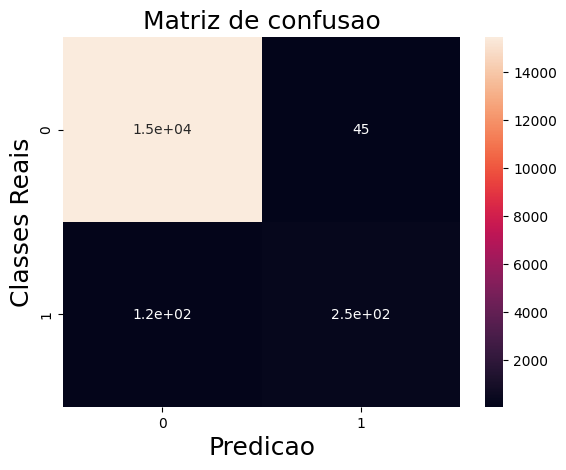

-----------------------------------------------------------------
Random_Forest


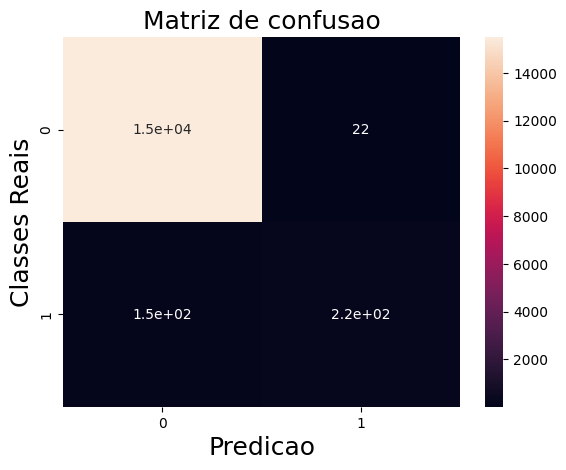

-----------------------------------------------------------------
Redes_Neurais
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


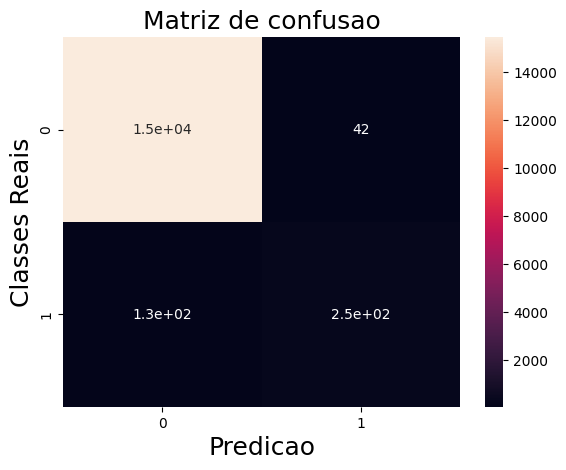

-----------------------------------------------------------------


In [61]:
for kay, model in modelos.items():
    print(kay)
    if kay == 'Redes_Neurais':
        y_proba = model.predict(x_teste)
        y_pred_redes = (y_proba > 0.5).astype(int).squeeze()
        sns.heatmap(confusion_matrix(y_teste.values, y_pred_redes),annot=True)
        plt.xlabel('Predicao',fontsize=18)
        plt.ylabel('Classes Reais',fontsize=18);
        plt.title('Matriz de confusao',fontsize=18)
        plt.show()
    else:
        sns.heatmap(confusion_matrix(y_teste.values, model.predict(x_teste)),annot=True)
        plt.xlabel('Predicao',fontsize=18)
        plt.ylabel('Classes Reais',fontsize=18);
        plt.title('Matriz de confusao',fontsize=18)
        plt.show()

    print('-----------------------------------------------------------------')

In [6]:
print('Modelo Random Forest:')
print(classification_report(y_teste.values, y_pred_random))

Modelo Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15518
           1       0.91      0.60      0.72       373

    accuracy                           0.99     15891
   macro avg       0.95      0.80      0.86     15891
weighted avg       0.99      0.99      0.99     15891



In [7]:
print('Modelo Redes Neurais:')
print(classification_report(y_teste.values, y_pred_redes))

Modelo Redes Neurais:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     15518
           1       0.85      0.66      0.75       373

    accuracy                           0.99     15891
   macro avg       0.92      0.83      0.87     15891
weighted avg       0.99      0.99      0.99     15891



## Curva ROC

In [47]:
def curva_roc(modelos):
    dict_recal = {}
    for kay, model in modelos.items():
        if kay == 'Redes_Neurais':
            y_proba = model.predict(x_treino)
            y_scores = (y_proba > 0.50).astype(int).squeeze()
            fpr, tpr, thresholds = roc_curve(y_treino,y_scores)
        else:
            y_scores = cross_val_predict(model, x_treino, y_treino, cv=3)
            fpr, tpr, thresholds = roc_curve(y_treino,y_scores)
        dict_recal[kay+'_fpr'], dict_recal[kay+'_tpr'], dict_recal[kay+'_thresholds'] = fpr, tpr, thresholds
    return dict_recal
dict_roc = curva_roc(modelos)

In [50]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dict_roc['Cat_Boost_fpr'], y=dict_roc['Cat_Boost_tpr'], mode='lines', name='Cat_Boost'))   
fig.add_trace(go.Scatter(x=dict_roc['Redes_Neurais_fpr'], y=dict_roc['Redes_Neurais_tpr'], mode='lines', name='Redes_Neurais'))
fig.add_trace(go.Scatter(x=dict_roc['Random_Forest_fpr'], y=dict_roc['Random_Forest_tpr'], mode='lines', name='Random_Forest'))
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='k--'))
fig.update_layout(
        title="Curva ROC",
        xaxis_title="False Positive Rate",
        yaxis_title="True Positive Rate",
        legend_title="Legenda",
        height=700,
        width=1500,
        yaxis=dict(range=[0, 1]),
        xaxis=dict(range=[0, 1])
        )

## Curva de predicao de custo por threshold

Para avaliar os modelos baseados no custo associado a diferentes thresholds, você pode criar uma função de custo personalizada e plotar a curva de custo em função do threshold. Isso permitirá identificar o threshold que minimiza o custo total para cada modelo.

Definir os custos:

- Inspeção sem defeito: $10
- Inspeção com defeito: $25
- Correção sem inspeção: $500

In [51]:
valor_monetario = {}
for kay, model in modelos.items():
    lista_valor_monetario = []
    lista_range = []
    for i in range(0, 10):
        if kay == 'Redes_Neurais':
            y_proba = model.predict(x_teste)
            y_pred_redes_threshold = (y_proba > i/10).astype(int)
            confusio = confusion_matrix(y_teste, y_pred_redes_threshold)
            lista_valor_monetario.append((confusio[0][0] * 0)+(confusio[1][1] * 25)+(confusio[0][1]*10)+(confusio[1][0]*500))
            lista_range.append(i/10)
        else:
            y_proba = model.predict_proba(x_teste)[:,1]
            y_pred_redes_threshold = (y_proba > i/10).astype(int)
            confusio = confusion_matrix(y_teste, y_pred_redes_threshold)
            lista_valor_monetario.append((confusio[0][0] * 0)+(confusio[1][1] * 25)+(confusio[0][1]*10)+(confusio[1][0]*500))
            lista_range.append(i/10)
    valor_monetario[kay] = lista_valor_monetario
valor_monetario['range'] = lista_range

predicao_custo = pd.DataFrame({
    'Cat_Boost': valor_monetario['Cat_Boost'],
    'Random_Forest': valor_monetario['Random_Forest'],
    'Redes_Neurais': valor_monetario['Redes_Neurais']
}, index=valor_monetario['range'])
    


497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 971us/step
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
497/497 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [52]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=predicao_custo.index, y=predicao_custo['Cat_Boost'], mode='lines', name='Cat_Boost'))
fig.add_trace(go.Scatter(x=predicao_custo.index, y=predicao_custo['Random_Forest'], mode='lines', name='Random_Forest'))
fig.add_trace(go.Scatter(x=predicao_custo.index, y=predicao_custo['Redes_Neurais'], mode='lines', name='Redes_Neurais'))
fig.update_layout(
        title="Predição do Custo de manutenção por nivel de threshold",
        xaxis_title="Threshold",
        yaxis_title="Custo de Manutenção",
        legend_title="Legenda",
        height=700,
        width=1500,
        yaxis=dict(range=[0, max(lista_valor_monetario) * 1.1]),
        )